In [1]:
import pandas as pd
import os
import gzip
import json
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm
from ast import literal_eval
import random
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = Path('../../../data/raw/PyTorrent')

In [3]:
def read_gzip_jsonl(mode: str, max_chunks=5):
    assert mode in ['train', 'test', 'valid']
    data = []
    archives = os.listdir(DATA_FOLDER / mode)
    if max_chunks > 0:
        archives = archives[:max_chunks]
    for archive_path in tqdm(archives, desc=f'Reading {mode} files'):
        frame = pd.read_json(DATA_FOLDER / mode / archive_path, lines=True)
        data.append(frame)
        
    return pd.concat(data, ignore_index=True)

train_data, val_data, test_data = [read_gzip_jsonl(mode) for mode in ['train', 'test', 'valid']]

Reading train files:   0%|          | 0/5 [00:00<?, ?it/s]

Reading test files:   0%|          | 0/5 [00:00<?, ?it/s]

Reading valid files:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
train_data.columns, all(column in test_data.columns for column in train_data.columns)

(Index(['repo', 'path', 'language', 'sha', 'url', 'partition', 'code',
        'original_string', 'code_tokens', 'func_name', 'docstring',
        'docstring_tokens', 'summary', 'code_with_docstring', 'code_tokens_py'],
       dtype='object'),
 True)

In [5]:
train_data.head()

,repo,path,language,sha,url,partition,code,original_string,code_tokens,func_name,docstring,docstring_tokens,summary,code_with_docstring,code_tokens_py
0,least_asymmetry-0.40,least_asymmetry-0.40//least_asymmetry/asym.pyf...,python,2b6cb84c474fb936f6d23ee570095fa49bd3573a,least_asymmetry-0.40//least_asymmetry/asym.pyf...,train,"def gaussian(height, center_x, center_y, width...","def gaussian(height, center_x, center_y, width...","[def, gaussian(height,, center_x,, center_y,, ...",least_asymmetry-0.40/file:/least_asymmetry/asy...,Returns a gaussian function with the given par...,"[Returns, a, gaussian, function, with, the, gi...",Returns a gaussian function with the given par...,"def gaussian(height, center_x, center_y, width...",[]
1,openhltspirent,openhltspirent//sessions/config/porttraffic/fr...,python,3db424bd2473f4cfc12ff6aaad98acd40aefcb5c,openhltspirent//sessions/config/porttraffic/fr...,train,@property\ndef Step(self):\n The step value...,"@property\ndef Step(self):\n """"""The step va...","[@property\ndef, Step(self):\n, , , , The, ste...",openhltspirent/class:Increment/Step,The step value of the increment pattern\n\nGet...,"[The, step, value, of, the, increment, pattern...",The step value of the increment pattern,"@property\ndef Step(self):\n """"""The step va...",[]
2,LaueTools,LaueTools//lauecore.pyfile:/lauecore.py:functi...,python,19e400ad1e1173ab8ee47857350f73d3bcec3a04,LaueTools//lauecore.pyfile:/lauecore.py:functi...,train,"def SimulateLaue_merge(grains, emin, emax, det...","def SimulateLaue_merge(grains, emin, emax, det...","[def, SimulateLaue_merge(grains,, emin,, emax,...",LaueTools/file:/lauecore.py:function:SimulateL...,Simulates Laue pattern full data from a list o...,"[Simulates, Laue, pattern, full, data, from, a...",Simulates Laue pattern full data from a list o...,"def SimulateLaue_merge(grains, emin, emax, det...",[]
3,wisdoms,wisdoms//utils.pyfile:/utils.py:function:cls_e...,python,efa107ba2f72d16af1aeeab42a8ca06613dc3367,wisdoms//utils.pyfile:/utils.py:function:cls_e...,train,def cls_exception(xpt):\n \n 类装饰器，捕获类生成实...,"def cls_exception(xpt):\n """"""\n 类装饰器，捕获类...","[def, cls_exception(xpt):\n, , , , \n, , , , 类...",wisdoms/file:/utils.py:function:cls_exception/...,类装饰器，捕获类生成实例方法下面所有异常。\n注意如果是静态方法，用类名调用方法名会报错，必...,"[类装饰器，捕获类生成实例方法下面所有异常, 。, 注意如果是静态方法，用类名调用方法名会报...",类装饰器，捕获类生成实例方法下面所有异常。,"def cls_exception(xpt):\n """"""\n 类装饰器，捕获类...",[]
4,ecl,ecl//grid/ecl_grid_generator.pyclass:EclGridGe...,python,93b1ab16fa60ab075ebb3caa9af5ec709af8bbb8,ecl//grid/ecl_grid_generator.pyclass:EclGridGe...,train,"@classmethod\ndef extract_subgrid_data(cls, di...","@classmethod\ndef extract_subgrid_data(cls, di...","[@classmethod\ndef, extract_subgrid_data(cls,,...",ecl/class:EclGridGenerator/extract_subgrid_data,"Extracts subgrid data from COORD, ZCORN and po...","[Extracts, subgrid, data, from, COORD, ,, ZCOR...","Extracts subgrid data from COORD, ZCORN and po...","@classmethod\ndef extract_subgrid_data(cls, di...",[]


In [6]:
train_data.iloc[0].code

'def gaussian(height, center_x, center_y, width_x, width_y, offset):\n    """\n    width_x = float(width_x)\n    width_y = float(width_y)\n    return lambda x, y: height * np.exp(-(((center_x - x) / width_x) ** 2 +\n        ((center_y - y) / width_y) ** 2) / 2) + offset\n'

In [7]:
train_df = train_data[['docstring_tokens', 'code_tokens', 'summary']]
val_df = val_data[['docstring_tokens', 'code_tokens', 'summary']]
test_df = test_data[['docstring_tokens', 'code_tokens', 'summary']]

In [8]:
train_df

,docstring_tokens,code_tokens,summary
0,"[Returns, a, gaussian, function, with, the, gi...","[def, gaussian(height,, center_x,, center_y,, ...",Returns a gaussian function with the given par...
1,"[The, step, value, of, the, increment, pattern...","[@property\ndef, Step(self):\n, , , , The, ste...",The step value of the increment pattern
2,"[Simulates, Laue, pattern, full, data, from, a...","[def, SimulateLaue_merge(grains,, emin,, emax,...",Simulates Laue pattern full data from a list o...
3,"[类装饰器，捕获类生成实例方法下面所有异常, 。, 注意如果是静态方法，用类名调用方法名会报...","[def, cls_exception(xpt):\n, , , , \n, , , , 类...",类装饰器，捕获类生成实例方法下面所有异常。
4,"[Extracts, subgrid, data, from, COORD, ,, ZCOR...","[@classmethod\ndef, extract_subgrid_data(cls,,...","Extracts subgrid data from COORD, ZCORN and po..."
...,...,...,...
507689,"[Get, the, list, of, first, names, ., :, retur...","[def, _get_names(self):\n, , , , Get, the, lis...",Get the list of first names.
507690,"[Method, called, by, the, proxy, to, send, a, ...","[def, __call(self,, peer,, subject,, content):...",Method called by the proxy to send a message o...
507691,"[Remove, dotfile(s, ), from, the, repository, .]","[def, remove(self,, files):\n, , , , """"""\n, , ...",Remove dotfile(s) from the repository.
507692,"[Reads, the, full, image, data, for, the, spec...","[def, read_image(self,, ifd):\n, , , , """"""\n, ...",Reads the full image data for the specified IF...


<strong>observation:</strong> non-English dostrings, dataset requires extra cleaning before fine-tuning; `isalpha` should do as a filter

In [9]:
for i in np.random.randint(0, len(train_data), 5):
    row = train_data.iloc[i]
    print(i, row["summary"])
    print(row["code_tokens"])
    print(' '.join(row["code_tokens"]))
    print('-' * 45)

104183 Generate random ObjectID in MongoDB format
['def', 'gen_random_object_id():\n', '', '', '', '\n', '', '', '', '\n', '', '', '', '"""\n', '', '', '', 'timestamp', '=', "'{0:x}'.format(int(time.time()))\n", '', '', '', 'rest', '=', "binascii.b2a_hex(os.urandom(8)).decode('ascii')\n", '', '', '', 'return', 'timestamp', '+', 'rest\n']
def gen_random_object_id():
    
    
    """
    timestamp = '{0:x}'.format(int(time.time()))
    rest = binascii.b2a_hex(os.urandom(8)).decode('ascii')
    return timestamp + rest

---------------------------------------------
223088 Whether the given function object is already registered.
['def', 'is_registered(self,', 'listener):\n', '', '', '', '"""\n', '', '', '', 'return', 'listener', 'in', 'self._listeners\n']
def is_registered(self, listener):
    """
    return listener in self._listeners

---------------------------------------------
14568 merges the branch information for content-divergent changesets and sets
['def', 'mergebranches(repo,', 

Train code number of tokens mean and std: 174.0025±2638.7708 with 6 <= code_len <= 1848758


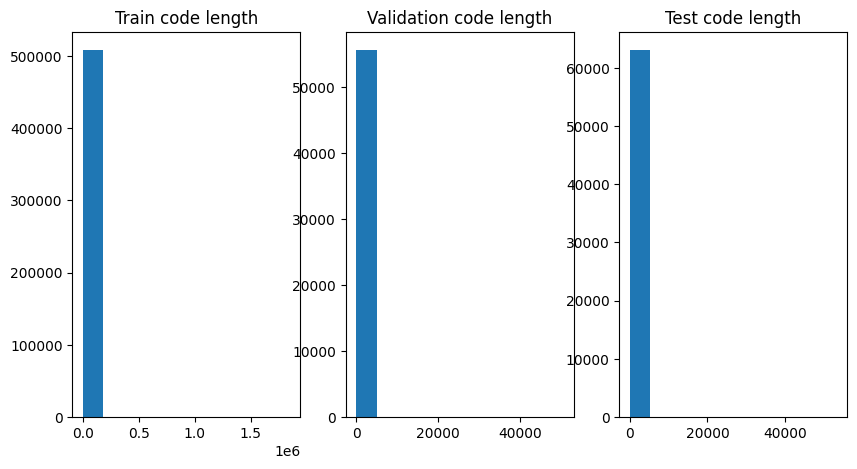

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_df["code_tokens"]])
plt.hist(lengths)
plt.title('Train code length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_df["code_tokens"]]
plt.hist(lengths)
plt.title('Validation code length')
plt.subplot(133)
lengths = [len(code) for code in test_df["code_tokens"]]
plt.title('Test code length')
plt.hist(lengths);

Train code number of tokens mean and std: 174.0025±2638.7708 with 6 <= code_len <= 1848758


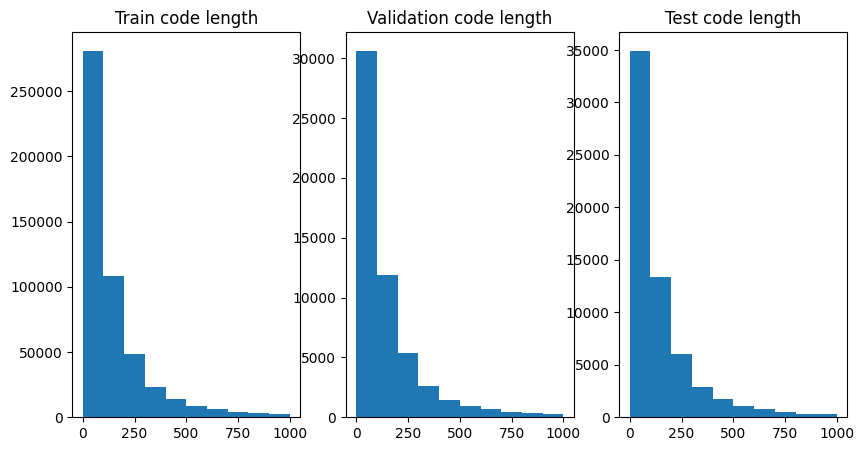

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_df["code_tokens"]])
plt.hist(lengths, range=(0, 1000))
plt.title('Train code length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_df["code_tokens"]]
plt.hist(lengths, range=(0, 1000))
plt.title('Validation code length')
plt.subplot(133)
lengths = [len(code) for code in test_df["code_tokens"]]
plt.title('Test code length')
plt.hist(lengths, range=(0, 1000));

Train code number of tokens mean and std: 42.8747±85.5732 with 1 <= code_len <= 16601


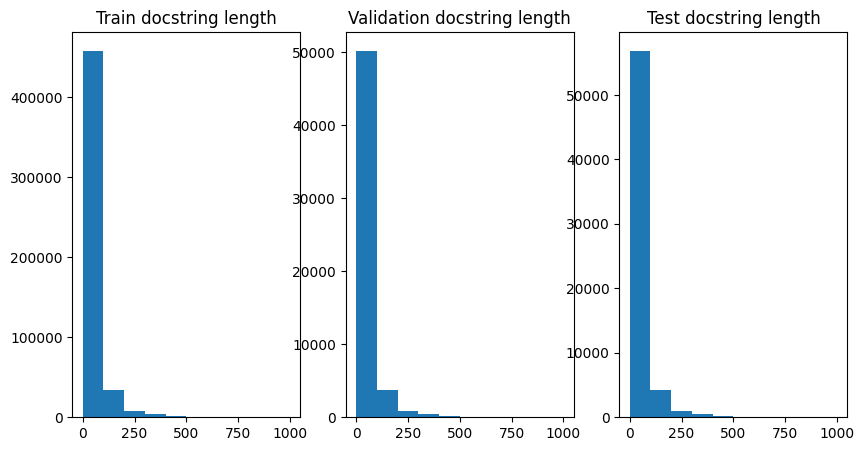

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_df["docstring_tokens"]])
plt.hist(lengths, range=(0, 1000))
plt.title('Train docstring length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in val_df["docstring_tokens"]]
plt.hist(lengths, range=(0, 1000))
plt.title('Validation docstring length')
plt.subplot(133)
lengths = [len(code) for code in test_df["docstring_tokens"]]
plt.title('Test docstring length')
plt.hist(lengths, range=(0, 1000));

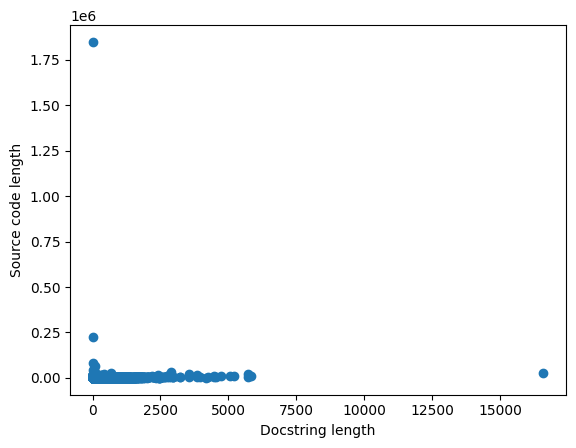

In [13]:
doc_lengths = np.array([len(code) for code in train_df["docstring_tokens"]])
code_lengths = np.array([len(code) for code in train_df["code_tokens"]])
plt.scatter(doc_lengths, code_lengths)
plt.xlabel('Docstring length') 
plt.ylabel('Source code length');

# Dataset report

Contains Python package libraries source code (gathered from 

## Raw data state

The overall format follows CodeSearchNet structure

There are non-English queries and tokens in the code: such pairs of <Nl, PL> should be filtered out from the data when preprocessing (`isalpha`)

Sometimes comments in the data are similar to the request, so information is duplicated. It is however to be tested whether model will overfit to searching for comments instead of extracting code features. 

There are few lines in the dataset with very long code sequence (up to 1848758), and ones with very long docstring (up to 16601), so there are 3 options available:
1. Drop these lines (safest option)
2. Chunk these code sections into smaller ones by some semantical criteria
3. Just use example packing to compensate for the length difference 

## Intersection with CodeXGLUE (and CodeSearchNet)

The dataset contains explicit links to repositories, so duplicates

The authors [1] claim the PyPI and Anaconda environment packages to be better documented in comparison to open-source projects, so this dataset should fit for fine-tuning. However, it is necessary to remove duplicates when constructing united Python dataset as many packages are likely to posted on Github.


## Sources

[1] https://github.com/fla-sil/PyTorrent